TO DOS For data science project presentation
1. research question
2. background research
3. exploratory data analysis
4. what kind of model we are making

In [91]:
# Load libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

Question: We aim to investigate whether data science techniques can denote countries sharing similar characteristics in terms of both food prices and nutritional value indices.

Signifcance: This research question addresses global challenges related to nutrition, food security, and sustainable development. The outcomes have the potential to guide the formulation of evidence-based policies, promoting better access to nutritious food and enhancing the well-being of the world.

Background: The Food Prices for Nutrition database integrates data from the International Comparison Program, food composition databases, and diverse nutritional sources, offering a comprehensive perspective on healthy diet economics across 176 countries. Our data science research project focuses on the pivotal variable "Percent of the population who cannot afford a healthy diet [CoHD_headcount]," aiming to assess the likelihood of food scarcity in specific nations. This metric serves as a key indicator for addressing global challenges related to nutrition accessibility and affordability.

In [53]:
Food_data = pd.read_csv(r"C:\Users\parke\Downloads\P_Data_Extract_From_Food_Prices_for_Nutrition\food_data.csv",encoding="latin")

In [85]:
#Drop columns that are not needed

#Food_data = pd.melt(Food_data, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Alcohol Consumption')
columns_to_drop = ['Classification Name', 'Classification Code', 'Classification Code', 'Time Code',]
df_food = Food_data.drop(columns=columns_to_drop)
df_food.head()

,Country Name,Country Code,Time,Cost of an energy sufficient diet [CoCA],Cost of a nutrient adequate diet [CoNA],Cost of a healthy diet [CoHD],Cost of a healthy diet relative to the cost of sufficient energy from starchy staples [CoHD_CoCA],Cost of fruits [CoHD_f],Cost of vegetables [CoHD_v],Cost of starchy staples [CoHD_ss],...,Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp],Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp],Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp],Percent of the population who cannot afford sufficient calories [CoCA_headcount],Percent of the population who cannot afford nutrient adequacy [CoNA_headcount],Percent of the population who cannot afford a healthy diet [CoHD_headcount],Millions of people who cannot afford sufficient calories [CoCA_unafford_n],Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n],Millions of people who cannot afford a healthy diet [CoHD_unafford_n],Population [Pop]
0,Albania,ALB,2017,0.725,2.471,3.952,5.45,0.911,0.707,0.599,...,0.078,0.266,0.425,0,8.9,31.3,0,0.3,0.9,2873457
1,Albania,ALB,2018,..,..,4.069,..,..,..,..,...,..,..,..,..,..,23,..,..,0.7,2866376
2,Albania,ALB,2019,..,..,4.262,..,..,..,..,...,..,..,..,..,..,22.2,..,..,0.6,2854191
3,Albania,ALB,2020,..,..,4.28,..,..,..,..,...,..,..,..,..,..,19.9,..,..,0.6,2837849
4,Albania,ALB,2021,..,..,4.388,..,..,..,..,...,..,..,..,..,..,15.7,..,..,0.4,2811666


In [86]:
#Need to drop .. values so that we can transform values to floats
df_food.replace('..', np.nan, inplace=True)
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 37 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Country Name                                                                                                930 non-null    object
 1   Country Code                                                                                                930 non-null    object
 2   Time                                                                                                        930 non-null    int64 
 3   Cost of an energy sufficient diet [CoCA]                                                                    186 non-null    object
 4   Cost of a nutrient adequate diet [CoNA]                                   

In [87]:
#We need to change the columns that are objects to strings and floats
columns_to_convert = df_food.columns[3:37]
df_food[columns_to_convert] = df_food[columns_to_convert].apply(pd.to_numeric, errors='coerce')


columns_to_convert2 = df_food.columns[0:2]
df_food[columns_to_convert2] = df_food[columns_to_convert2].astype(str)
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 37 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Country Name                                                                                                930 non-null    object 
 1   Country Code                                                                                                930 non-null    object 
 2   Time                                                                                                        930 non-null    int64  
 3   Cost of an energy sufficient diet [CoCA]                                                                    186 non-null    float64
 4   Cost of a nutrient adequate diet [CoNA]                             

In [88]:
# Group by the 'country' column and calculate the total number of NaN values for each country
nan_counts_per_country = df_food.groupby('Country Name').apply(lambda x: x.isnull().sum()).sum(axis=1)

# Replace 'nutrition_variable_column' with the actual name of the column you're interested in
column_of_interest = 'Percent of the population who cannot afford a healthy diet [CoHD_headcount]'

# Calculate the total number of NaN values for each country in the specified column
nan_counts_per_country = df_food.groupby('Country Name')[column_of_interest].apply(lambda x: x.isnull().sum())

# Create a new DataFrame with country names and their corresponding NaN counts for the specified column
nan_counts_df = pd.DataFrame({'Country Name': nan_counts_per_country.index, 'NaN_Counts': nan_counts_per_country.values})

# Sort the DataFrame based on NaN counts in descending order
sorted_nan_counts_df = nan_counts_df.sort_values(by='NaN_Counts', ascending=False)

# Display the DataFrame with NaN counts per country for the specified column
print(sorted_nan_counts_df.head(50))

# Get the list of countries with 5 or more NaN values
countries_to_drop = nan_counts_df[nan_counts_df['NaN_Counts'] >= 5]['Country Name']

# Drop rows with the specified countries from the original DataFrame
df_filtered = df_food[~df_food['Country Name'].isin(countries_to_drop)]

# Display the filtered DataFrame
print(df_filtered)

                       Country Name  NaN_Counts
150                       Singapore           5
58                Equatorial Guinea           5
160  St. Vincent and the Grenadines           5
41                          Comoros           5
27                Brunei Darussalam           5
26           British Virgin Islands           5
170                            Togo           5
158             St. Kitts and Nevis           5
46                          Curacao           5
22                          Bonaire           5
173        Turks and Caicos Islands           5
151       Sint Maarten (Dutch part)           5
19                          Bermuda           5
52                         Dominica           5
57                      El Salvador           5
145                    Saudi Arabia           5
32                         Cambodia           5
14                         Barbados           5
140                           Qatar           5
12                          Bahrain     

In [108]:
#Lets now evaluate the rows with nan values and see if there are any persistent problems
#na_counts = df_filtered_food.isna().sum()
#print(na_counts)
# Check for NaN values in each row
#rows_with_nadf_filteredod.isna().any(axis=1)

# Display rows with NaN values
#print("Rows with NaN values:")
#print(df_filteredows_with_na)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1762009840.py, line 9)

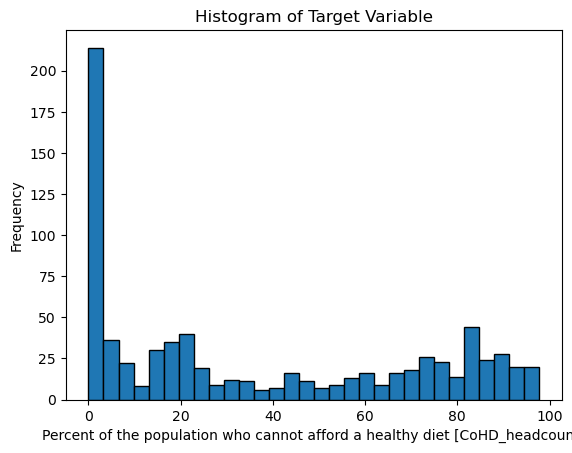

In [ ]:
#Lets look at the distribution of the target variable

#Histogram
import matplotlib.pyplot as plt
# Assuming 'target_variable' is the name of your target variable
plt.hist(df_filtered['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'], bins=30, edgecolor='black')
plt.title('Histogram of Target Variable')
plt.xlabel('Percent of the population who cannot afford a healthy diet [CoHD_headcount]')
plt.ylabel('Frequency')
plt.show()
# looks like a lot of entries have low percentages of populations that cant afford healthy food. lets look at the lowest countries

In [109]:
#There seems to be a lot of values at 0, lets see which countries fall in this bin. 
# Group by country and calculate statistics for the target variable
grouped_data = df_filtered.groupby('Country Name')['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'].describe()
# Display the countries with the most values in the first bin
countries_in_first_bin = grouped_data[grouped_data['25%'] <= df_filtered['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'].min()]
print(countries_in_first_bin)
#These countries have very high development indexes and thus would have very low values of percent of the population who cannot afford a healthy diet

              count  mean       std  min  25%  50%  75%  max
Country Name                                                
Azerbaijan      5.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0
Iceland         5.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0
Luxembourg      5.0  0.18  0.204939  0.0  0.0  0.1  0.4  0.4
Slovenia        5.0  0.06  0.054772  0.0  0.0  0.1  0.1  0.1
Switzerland     5.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0


Axes(0.125,0.11;0.775x0.77)


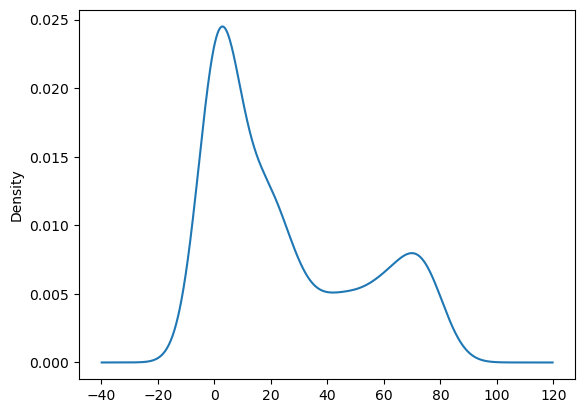

In [113]:
# Density plot
print(df_filtered['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'].plot.density())

Median: 16.1
Maximum: 79.8


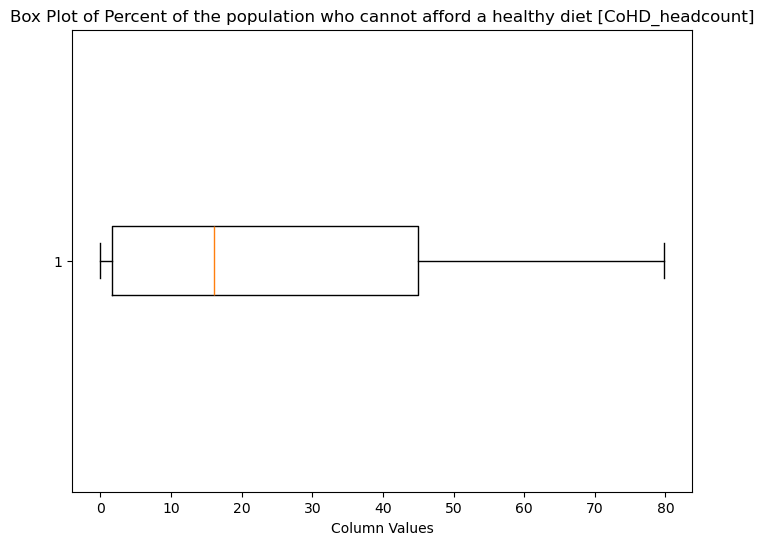

In [99]:
# created a boxplot to find the median and max to see how we should bin the data
import matplotlib.pyplot as plt

column_to_plot = 'Percent of the population who cannot afford a healthy diet [CoHD_headcount]'

plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered[column_to_plot].dropna(), vert=False)
plt.title(f'Box Plot of {column_to_plot}')
plt.xlabel('Column Values')
median_value = df_filtered[column_to_plot].median()
max_value = df_filtered[column_to_plot].max()
print(f"Median: {median_value}")
print(f"Maximum: {max_value}")
plt.show()


#df_filtered = df_filtered.loc[df_filtered['Percent of the population who cannot afford a healthy diet [CoHD_headcount]']< 80,:]  


In [107]:
#add this as a predictor instead of replacing the numeric version
# this predictor indicates the countries that have a high percentage of people who cant afford a healthy diet as a 1 and those who dont as a 0
df_food['CoHD_category'] = pd.cut(df_food['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'], bins=[-1, 16.1, 79.8], labels=[0, 1])
#said that countries that are a concern are above median

Decision Trees and Probablity (method): We plan to use decision trees to understand critical features influencing the affordability of a healthy diet across countries. These decision trees will facilitate the identification of distinct clusters representing varying levels of food scarcity. Simultaneously using probability estimates to support our analysis by providing insights into the likelihood of specific nations encountering challenges related to nutrition accessibility.